
# Topic 13: Central Limit Theorem

- onl01-dtsc-ft-022221

- 03/26/21


## Topics 

- Review: Normal distribution/Standard Normal Distribution
- Z-tests with Normal Distribution
- Sampling
- Central Limit Theorem
- Confidence Intervals

## Questions

- In the sampling statistics lab, the solution for the last task, in which we are asked to compute the standard error for each of our sets of samples, appears to use a population standard deviation calculation for the numerator (i.e. doesn't do std with n-1, of ddof=1). Since we're calculating the sample standard deviation, shouldn't we divide by n-1?
This is the line: err = round(np.std(means)/np.sqrt(n), 2)


##  Resources for Hypothesis Testing

- **[My Hypothesis Testing Guide/Repo](https://github.com/jirvingphd/hypothesis_testing_workflow_python)** (for next class)
    - [Slideshow on Hypothesis Testing with scipy:](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)

# Announcements/The Long-View

>I know a lot of folks are behind and stressed about the large amount of new content, so here is the long-view for this Phase.
- **Topics Essential for Phase 2 Project**
    - Topic 12, 18, 19, Appendix: Multiple Regression Project
- **Topics to Review Before Job Interviews:**
    - Topics 11,12,17
- **Topics Related to Hypothesis Testing:**
    - Topic 13,14,15,16

# Review: Normal Distribution

In [2]:
# !pip install -U fsds
from fsds.imports import *
import scipy.stats as stats
plt.rcParams['figure.figsize'] = (10,5)

fsds v0.3.2 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


> **The Normal Distribution is symmetrical and its mean, median and mode are equal.** 
* area under curve is equal to 1.0
* denser in the center and less dense in the tails
* defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).

> **The Standardized Normal Distribution** is a special case of the Normal Distribution where the mean is 0 and the std is 1.
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


- Special case of the normal distribution where $\mu=0$ and $\sigma=1$

In [3]:
## Loading Heihgt Weight Dataset
dfh = fs.datasets.load_height_weight()
dfh = dfh.groupby('Gender').get_group('Male')
dfh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


In [4]:
## Our Function From Yesterday(modified) 

def plot_distribution(dfh, col='HeightZ', verbose=True,boxplot=True):
    
    df = dfh.copy()
    
    ## Calc mean and mean skew and curtosis
    median = df[col].median().round(2)
    mean = df[col].mean().round(2)
    skew_val = round(stats.skew(df[col], bias=False),2)
    kurt_val = round(stats.kurtosis(df[col],bias=False),2)
    
    
    ## Plot distribution 
    fig, ax = plt.subplots(nrows=2,figsize=(10,8))
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0])
    sns.kdeplot(df[col],color='green',label='KDE',ax=ax[0])
    ax[0].set(ylabel='Density',title=col.title())
    ax[0].set_title(F"Distribution of {col}")
    ax[0].axvline(median,label=f'median={median:,}',color='black')
    ax[0].axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax[0].legend()
    
    ## Plot Boxplot
    sns.boxplot(data=df ,x=col,ax=ax[1])
    
    ## Tweak Layout & Display
    fig.tight_layout()
    
    ## Delete boxplot if unwanted
    if boxplot == False:
        fig.delaxes(ax[1])
    
    if verbose:
        plt.show()

        print('[i] Distribution Stats:')
        print(f"\tSkew = {skew_val}")
        print(f"\tKurtosis = {kurt_val}")


        ## Test for normality
        result = stats.normaltest(df[col])
        print('\n',result)
        if result[1]<.05:
            print('\t- p<.05: The distribution is NOT normally distributed.')
        elif result[1] >=.05:
            print('\t- p>=.05: The distribution IS normally distributed')
    
    return fig, ax

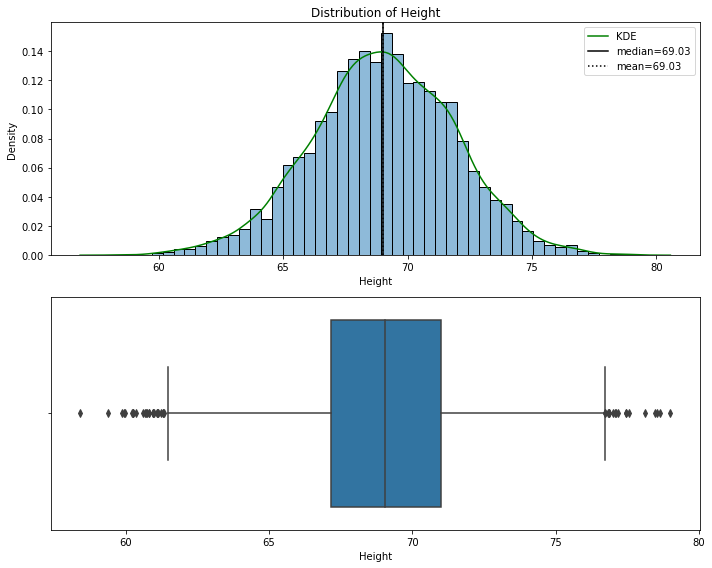

[i] Distribution Stats:
	Skew = -0.06
	Kurtosis = 0.08

 NormaltestResult(statistic=4.278504989483648, pvalue=0.11774282351443159)
	- p>=.05: The distribution IS normally distributed


In [5]:
plot_distribution(dfh,'Height');

## Standardized Normal Distribution

### Z-Scores

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\frac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation

In [6]:
## Calculate z-score for Height
h_mean =  dfh['Height'].mean()
h_std = dfh['Height'].std()
dfh['HeightZ'] = (dfh["Height"] - h_mean)/ h_std
# dfh['HeightZ'] = stats.zscore(dfh["Height"])


# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(dfh[['Height']])
dfh.describe().round(2)

,Height,Weight,HeightZ
count,5000.00,5000.00,5000.00
mean,69.03,187.02,0.00
std,2.86,19.78,1.00
min,58.41,112.90,-3.71
25%,67.17,173.89,-0.65
50%,69.03,187.03,0.00
75%,70.99,200.36,0.69
max,79.00,269.99,3.48


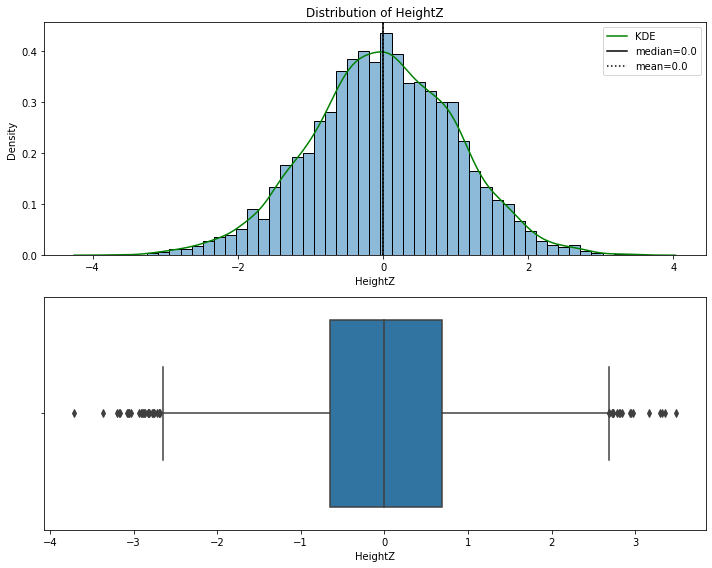

[i] Distribution Stats:
	Skew = -0.06
	Kurtosis = 0.08

 NormaltestResult(statistic=4.278504989484141, pvalue=0.11774282351440257)
	- p>=.05: The distribution IS normally distributed


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of HeightZ'}, xlabel='HeightZ', ylabel='Density'>,
        <AxesSubplot:xlabel='HeightZ'>], dtype=object))

In [7]:
## Plot Z-Score height
plot_distribution(dfh, 'HeightZ')

- Once data is standardized, can start answering questions about population membership using $Z$-Tests

___

# Statistical Testing with Z-scores and p-values

## Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=40%>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.



## What Are Hypotheses ?

- Null Hypothesis: $H_0$ there is no relationship / the samples come from the same population.

- Alternative: $H_A$/$H_1$ there is a relationship / the samples DO NOT come from same distribution

### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

 ### $\large \alpha$= 0.05


- What does it mean?
    - cutoff for judging whether our sample is "significantly" different than the population.
    - % chance that you would observe this sample from your population dataset







| Set     | $H_0   $    | $H_a$ | Tails |
|---------|-------|-------|-------|
|<img width=30/>|<img width=100/>|<img width=100/>|<img width=50/>|
| 1  | $\mu= M $ |$\mu \neq M $ | 2  | 
| 2  | $\mu \geq M $ |$\mu < M $ | 1  | 
| 3  | $\mu \leq M $ |$\mu > M $ | 1  | 


### Example Z-Test 

- We have the height of 77 inches an unknown lifeform, does it come from the Human male population?

#### State our Hypothesis and Null Hypothesis

$H_0$ =  The lifeform's height comes from the human male population.

$H_1$ = The liferom has a significantly higher height than human males.

In [8]:
potential_alien_lifeform = 77 #height

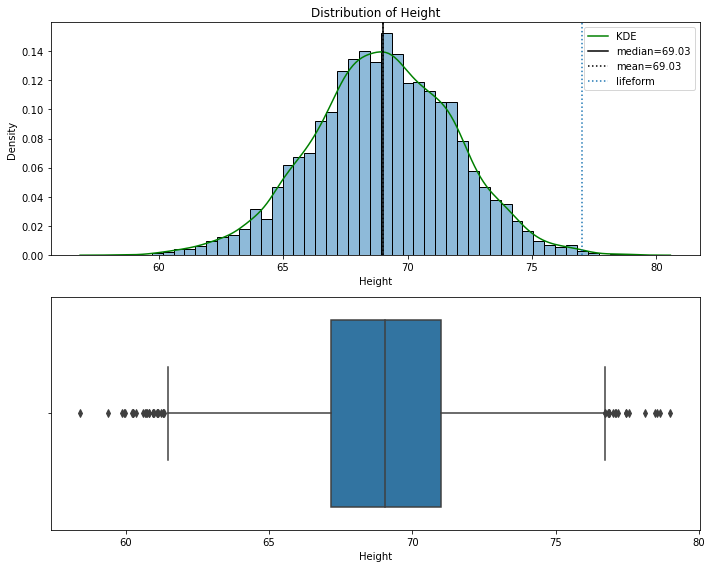

In [9]:
## Plot distrubtion, add axvline with lifeform's height
fig, ax = plot_distribution(dfh,col="Height",boxplot=True,verbose=False)
ax[0].axvline(potential_alien_lifeform,ls=':',label='lifeform')
ax[0].legend()

In [10]:
## Calculate Z-score for the lifeform
# z_alien = scaler.transform([[potential_alien_lifeform]]).flatten()
z_alien = (potential_alien_lifeform-h_mean)/h_std
z_alien

2.7847172159955136

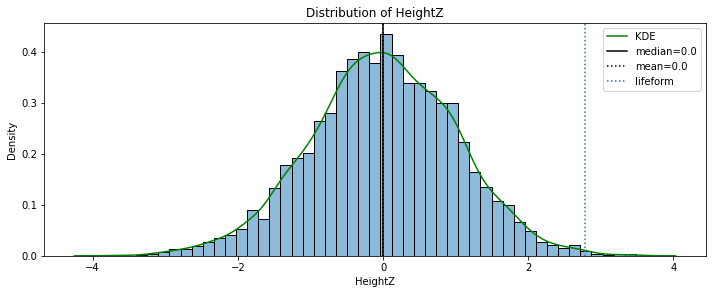

In [11]:
## Plot Z-Scored Height and z_alien
fig, ax = plot_distribution(dfh,col="HeightZ",boxplot=False,verbose=False)
ax[0].axvline(z_alien,ls=':',label='lifeform')
ax[0].legend()

- [Scipy.stats.norm documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [12]:
## Get the critical value for z-test for a one-tailed test with alpha=0.05 (so really 0.025)
critical_value = stats.norm.ppf(.975)
critical_value

1.959963984540054

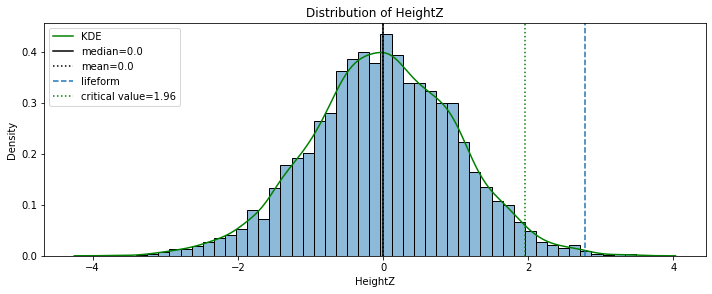

In [13]:
## Replot HeightZ, alienz and add critical value
fig,ax = plot_distribution(dfh,col="HeightZ",verbose=False,boxplot=False)
ax[0].axvline(z_alien,ls="--",label='lifeform')
ax[0].axvline(critical_value,color='green',ls=':',
           label=f'critical value={round(critical_value,2)}')
ax[0].legend()

In [14]:
## calculate the p-value of observing a human with this height
p = 1 - stats.norm.cdf(z_alien)
p

0.0026787211865080263

### Confidence Intervals

In [15]:
## Remind us of our critical value
critical_value

1.959963984540054

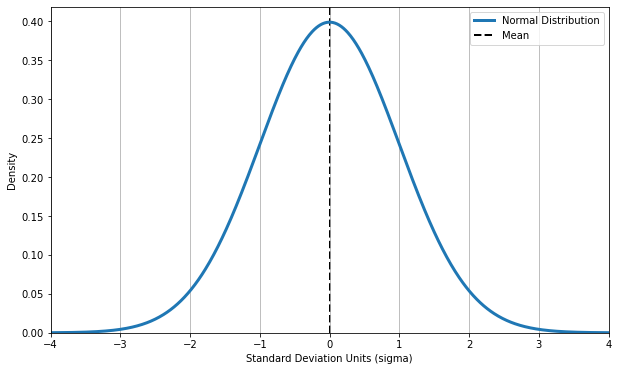

In [16]:
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

plot_normal();

In [17]:
## Use scipy stats to calculate 95 % confidence interval
ci_low,ci_high = stats.norm.interval(.95)
ci_low,ci_high

(-1.959963984540054, 1.959963984540054)

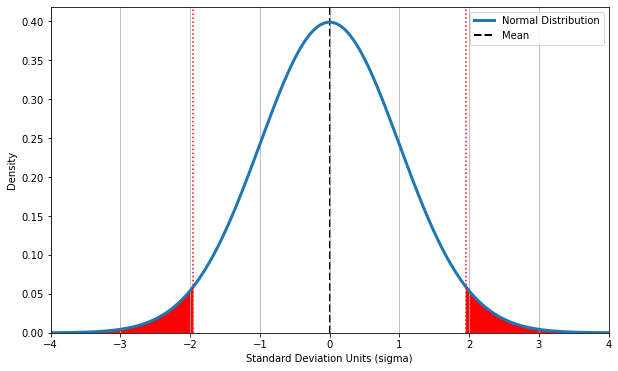

In [18]:
## Get normal dist figure
fig,ax =plot_normal(x,y)

## Critical Values (from z-table lookup)


## Plot critical values 
crit_kws = dict(c='red',ls=':')
ax.axvline(ci_high,**crit_kws)
ax.axvline(ci_low,**crit_kws)

# Fill tails
ax.fill_between(x,y,where=(x>ci_high)|(x<ci_low),color='red')#&(y)


<!---For $z$-tests, a $z$-statistic is used as our test statistic. You'll see other test statistics suitable for other tests later. A one-sample $z$-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". --->


# Central Limit Theorem

> "The central limit theorem states that, under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases."
- This becomes very useful for applying statistical logic to sample statistics in order to estimate population parameters.
- The means of samples from the population will form a normal distribution, ***no matter what how a population's distribution is shaped!***


In [19]:
# pop = #pd.read_csv('../topic_12_statistical_distributions/joined_movie_data_for_sg.csv')
# pop = pop[['domestic_gross']]
pop = dfh[['Height']].copy()
pop

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
4995,68.860062
4996,68.973423
4997,67.013795
4998,71.557718


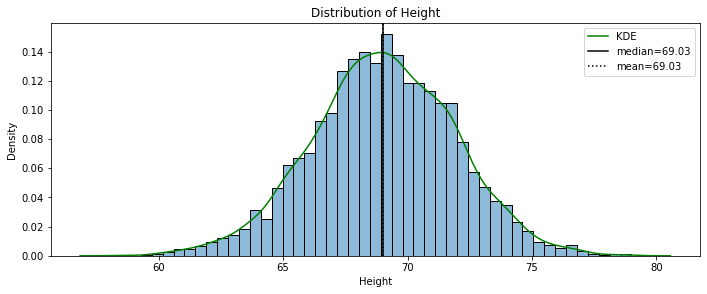

[i] Distribution Stats:
	Skew = -0.06
	Kurtosis = 0.08

 NormaltestResult(statistic=4.278504989483648, pvalue=0.11774282351443159)
	- p>=.05: The distribution IS normally distributed


In [20]:
## Saving the Population Domestic Gross
plot_distribution(pop,col='Height',boxplot=False);

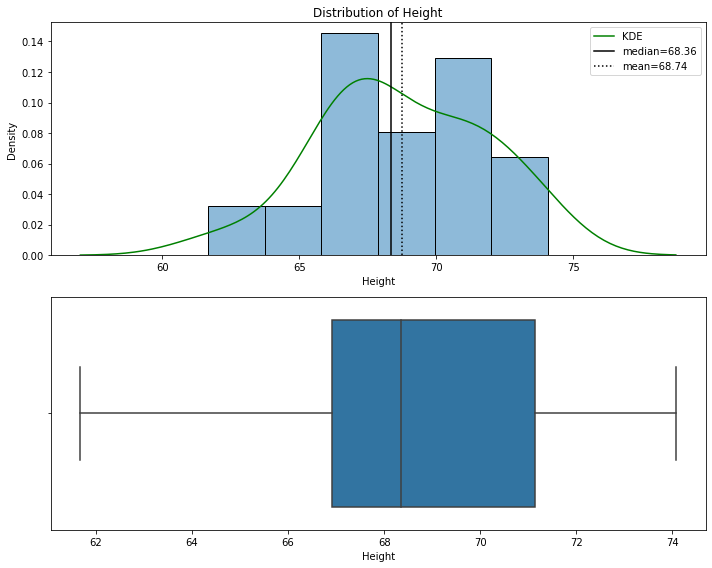

[i] Distribution Stats:
	Skew = -0.12
	Kurtosis = -0.36

 NormaltestResult(statistic=0.17401457056466202, pvalue=0.9166704174060306)
	- p>=.05: The distribution IS normally distributed


In [21]:
## Create a sample of 30 from the population and plot
plot_distribution(pop.sample(n=30, random_state=42),'Height');

### Demonstrating How Taking Many Samples Creates a Normal Distribution of Means (like in CLT Lab)

In [22]:
sample_size = 20
N_SAMPLES = 10000

In [23]:
## RESAMPLE AND PLOT MEANS
## Empty lists for samples and means
samples = [] 
sample_means = []

## Get Samples & Means
for i in range(N_SAMPLES):
    sample = pop.sample(sample_size)
    samples.append(sample)
    
    sample_means.append(sample.mean().values[0])



In [24]:
%%time
## Make the sample means into a df (for compatibilitty with our function)
sample_means_df = pd.DataFrame({'# Samples': range(N_SAMPLES),
                                'sample means':sample_means})
sample_means_df

CPU times: user 3.27 ms, sys: 432 µs, total: 3.7 ms
Wall time: 3.87 ms


,# Samples,sample means
0,0,69.245138
1,1,69.277855
2,2,68.998687
3,3,68.752731
4,4,68.663567
...,...,...
9995,9995,69.275872
9996,9996,69.365878
9997,9997,68.906289
9998,9998,68.893106


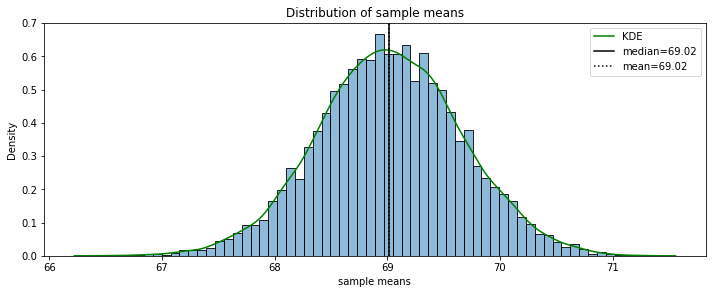

[i] Distribution Stats:
	Skew = -0.02
	Kurtosis = 0.04

 NormaltestResult(statistic=1.1655526590696743, pvalue=0.5583460600481138)
	- p>=.05: The distribution IS normally distributed


In [25]:
# Plot the sample means distribution
plot_distribution(sample_means_df,col='sample means',boxplot=False);

In [26]:
pop.mean()

Height    69.026346
dtype: float64

# The T-Distribution & T-Tests

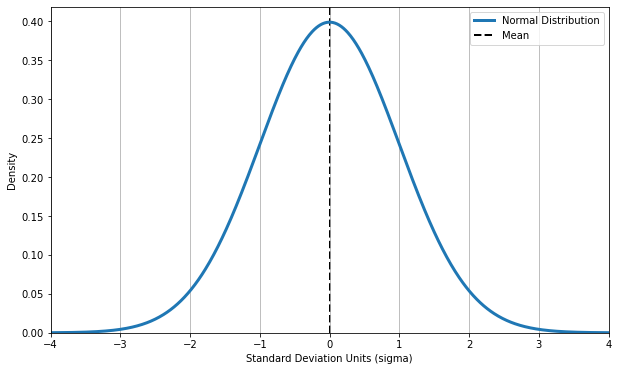

In [27]:
## Plot a normal distribution
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

plot_normal();

- We usually won't know the population data, so we can modify the statistical distribution to account for this.

In [28]:
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)


In [30]:
# stats.t.pdf(x,)

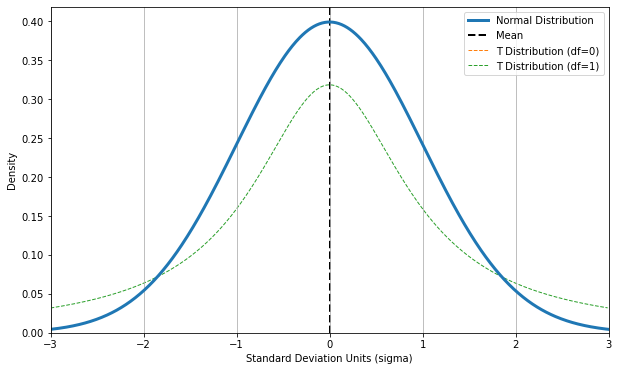

In [31]:
## The T-Distribution

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution  [0,1,2,3,50,100,1000]:#,
## Adding T-Distribution 
for degrees_freedom in [0,1]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


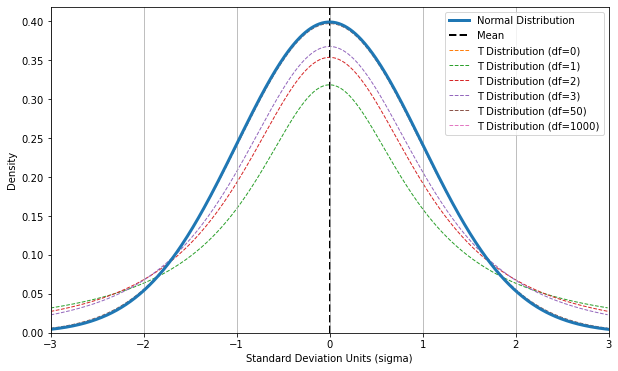

In [33]:
## The T-Distribution

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution  [0,1,2,3,50,100,1000]:#,
## Adding T-Distribution 
for degrees_freedom in [0,1,2,3,50,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


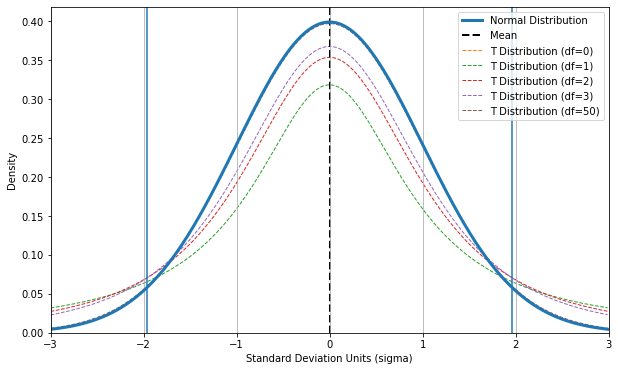

In [74]:
## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


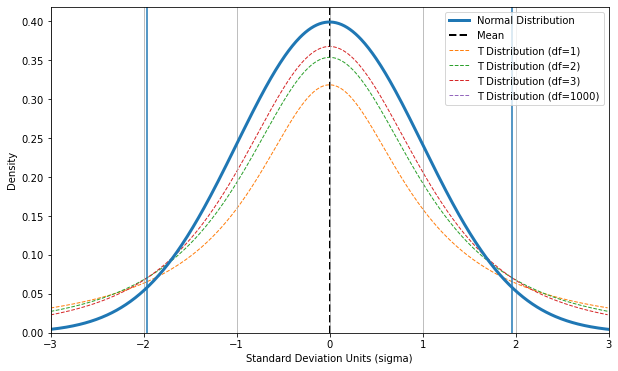

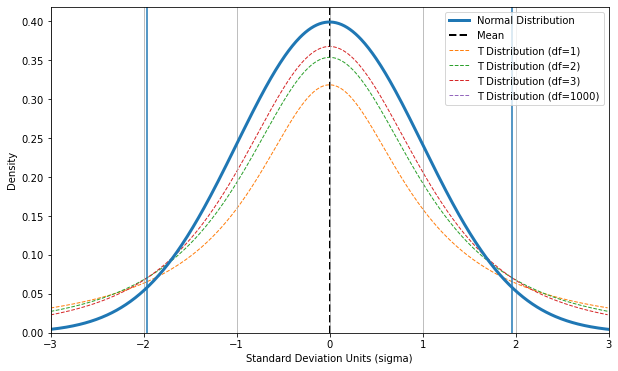

In [34]:
## The T-Distribution & T-Tests

## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


In [ ]:
dfh.std()